In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('..\\datasets\\21-dynamic-pricing\\dynamic_pricing.csv')
#https://statso.io/dynamic-pricing-case-study/

In [3]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
data.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

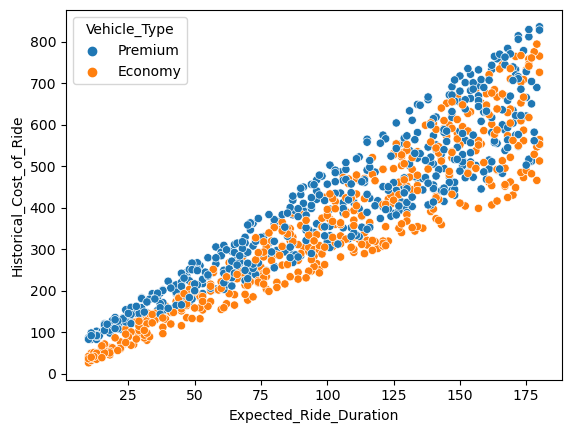

In [5]:
sns.scatterplot(data,x='Expected_Ride_Duration',y='Historical_Cost_of_Ride',hue='Vehicle_Type')

<Axes: xlabel='Number_of_Riders', ylabel='Number_of_Drivers'>

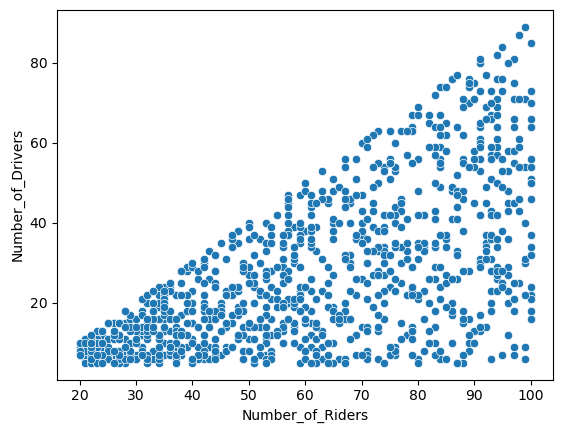

In [6]:
sns.scatterplot(data,x='Number_of_Riders',y='Number_of_Drivers')

In [7]:
data['rider_per']=data['Number_of_Riders'].rank(pct=True)
data['driver_per']=data['Number_of_Drivers'].rank(pct=True)
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,rider_per,driver_per
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.8530,0.8175
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,0.4755,0.7655
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.2775,0.6575
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.8425,0.6060
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.7145,0.5010


In [8]:
#map riders' number rank percentile 0%-100% to price multiplier 80%-120%
rider_multiplier=np.interp(data['rider_per'],[0,1],[0.8,1.2])
#map drivers' number rank percentile 0%-100% to price multiplier 120%-80%
driver_multiplier=np.interp(data['driver_per'],[0,1],[1.2,0.8])

data['adj_cost']=data['Historical_Cost_of_Ride']*(rider_multiplier)*(driver_multiplier)

In [9]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,rider_per,driver_per,adj_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.8530,0.8175,283.196311
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,0.4755,0.7655,153.886243
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.2775,0.6575,281.515721
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.8425,0.6060,511.950963
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.7145,0.5010,629.166321


In [10]:
data['adj_cost'].sum()/data['Historical_Cost_of_Ride'].sum()
# there is no revenue increase which means we need to adjust the mapping range

0.9895133775844911

In [11]:
#map riders' number rank percentile 0%-100% to price multiplier 90%-120%
rider_multiplier=np.interp(data['rider_per'],[0,1],[0.9,1.2])
#map drivers' number rank percentile 0%-100% to price multiplier 120%-90%
driver_multiplier=np.interp(data['driver_per'],[0,1],[1.2,0.9])

In [12]:
data['adj_cost']=data['Historical_Cost_of_Ride']*(rider_multiplier)*(driver_multiplier)
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,rider_per,driver_per,adj_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.8530,0.8175,313.705054
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,0.4755,0.7655,175.915247
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.2775,0.6575,325.163141
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.8425,0.6060,551.889315
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.7145,0.5010,678.072602


In [13]:
data['adj_cost'].sum()/data['Historical_Cost_of_Ride'].sum()

1.096151409730017

<Axes: xlabel='Expected_Ride_Duration', ylabel='adj_cost'>

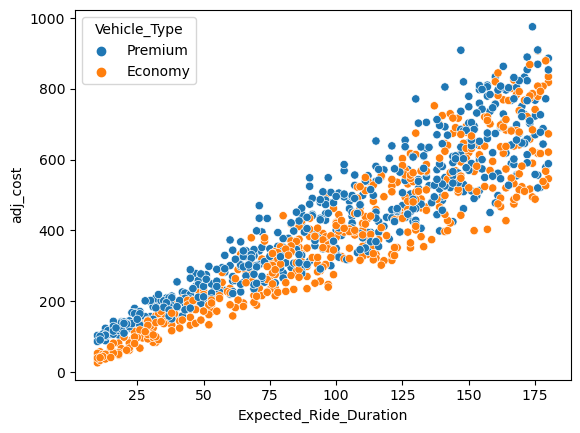

In [14]:
sns.scatterplot(data,x='Expected_Ride_Duration',y='adj_cost',hue='Vehicle_Type')

In [15]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,rider_per,driver_per,adj_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.8530,0.8175,313.705054
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,0.4755,0.7655,175.915247
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.2775,0.6575,325.163141
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.8425,0.6060,551.889315
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.7145,0.5010,678.072602


In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [17]:
model=XGBRegressor(enable_categorical=True)

In [18]:
X=data.drop(columns=['rider_per','driver_per','adj_cost','Historical_Cost_of_Ride'])
X['Location_Category']=X['Location_Category'].astype('category')
X['Customer_Loyalty_Status']=X['Customer_Loyalty_Status'].astype('category')
X['Time_of_Booking']=X['Time_of_Booking'].astype('category')
X['Vehicle_Type']=X['Vehicle_Type'].astype('category')

Y=data[['Historical_Cost_of_Ride','adj_cost']]

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
model.fit(X_train,Y_train['adj_cost'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
ypred=model.predict(X_test)

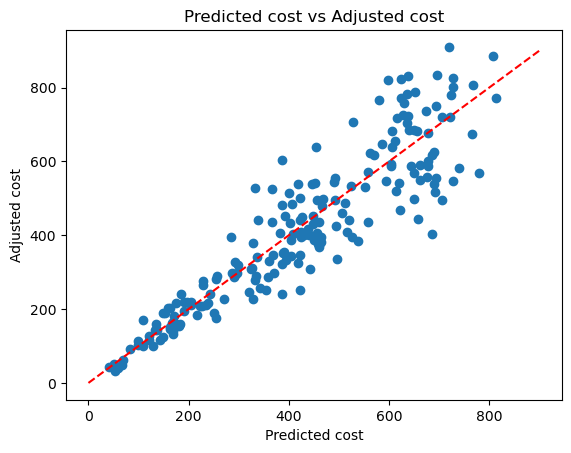

In [22]:
plt.scatter(ypred,Y_test['adj_cost'])
plt.plot([0,900],[0,900],'r--')
plt.xlabel('Predicted cost')
plt.ylabel('Adjusted cost')
plt.title('Predicted cost vs Adjusted cost')
plt.show()

In [23]:
revenue_change=ypred.sum()/Y_test['Historical_Cost_of_Ride'].sum()
print((revenue_change-1)*100,'%')

10.859698145810693 %


#here we do not take the order number change into account since we dont have enough data